# **DATA MODELING - REGRESSION - NOTEBOOK**

## Objectives

* Fit and evaluate a regression model to predict amount levels for a prospect that will likely suffer a damage

## Inputs

* outputs/datasets/collection/dataPP5_cleaned_10k.csv

## Outputs

* Train set (features and target)
* Test set (features and target)
* ML pipeline to predict amount
* labels map
* Feature Importance Plot

## Comments

* steps to prepare the data for the model, then the model
* pipeline should identify a training outcome and a prediction outcome, through 
   * predictor estimator .fit() & .predict() 
   * transformer estimator .fit() & .transform()


---

# Change working directory

* access the current directory
* make the parent of the current directory the new current directory

In [4]:
import os
current_dir = os.getcwd()
os.chdir(os.path.dirname(current_dir))
current_dir = os.getcwd()
current_dir

'/workspace/PP5_My_project'

---

# Import Packages

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
from sklearn.pipeline import Pipeline

---

# Load Data

In [6]:
df = pd.read_csv('outputs/datasets/collection/dataPP5_cleaned_10k.csv').query("Damage == 1").drop(labels=['DATE OCC', 'LAT', 'LON', 'Damage'], axis=1)
print(df.shape)
df.head(3)

(5781, 16)


,TIME OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,LOCATION,Cross Street,Day of Week,Amount
1,1130,14,Pacific,330,BURGLARY FROM VEHICLE,32,F,W,101.0,STREET,999.0,NO WEAPON,2400 CLARK AV,NO CROSS STREET,1,2000.0
2,2130,1,Central,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",34,F,H,122.0,"VEHICLE, PASSENGER/TRUCK",999.0,NO WEAPON,1200 S FIGUEROA ST,NO CROSS STREET,7,900.0
3,1700,21,Topanga,510,VEHICLE - STOLEN,0,X,X,108.0,PARKING LOT,999.0,NO WEAPON,7000 ALABAMA AV,NO CROSS STREET,3,20000.0


---

## Feature Scaling and Feature Selection

### Feature Scaling 

* to give the data the properties of a standard normal distribution with a mean of zero and a standard deviation of one
* the variable distribution will be slightly different, but we create better condition for the algorithm to learn the patterns and relationships and generalize on unseen data

In [7]:
# Using StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create Pipeline
pipeline = Pipeline([
    ("ScaleMeGood", StandardScaler())
])

In [8]:
# Loading TrainSetRegressionCleaned.csv
dftrainreg = pd.read_csv('outputs/datasets/cleaned/TrainSetRegressionCleaned.csv').drop(labels=['LAT', 'LON'], axis=1)
print(dftrainreg.shape)
dftrainreg.head(3)

(8000, 20)


,TIME OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,LOCATION,Cross Street,Day of Week,Amount,Damage,Year_OCC,Month_OCC,Day_OCC
0,1000,15,8,626,53,21,0,15,101.0,164,400.0,46,5410,574,2,0.0,0,2021,6,1
1,1910,1,1,440,85,33,1,6,102.0,156,999.0,31,2544,184,7,950.0,1,2020,3,8
2,2320,3,15,230,2,26,1,15,101.0,164,400.0,46,6830,335,7,0.0,0,2022,3,6


In [9]:
# Loading TestSetRegressionCleaned.csv
dftestreg = pd.read_csv('outputs/datasets/cleaned/TestSetRegressionCleaned.csv').drop(labels=['LAT', 'LON'], axis=1)
print(dftestreg.shape)
dftestreg.head(10)

(2000, 20)


,TIME OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,LOCATION,Cross Street,Day of Week,Amount,Damage,Year_OCC,Month_OCC,Day_OCC
0,2300,18,14,510,95,0,2,15,101.0,164,999.0,31,6654,184,7,20000.0,1,2020,2,16
1,1900,5,4,510,95,0,2,15,101.0,164,999.0,31,78,574,3,20000.0,1,2022,10,19
2,1820,1,1,210,70,27,0,14,104.0,42,400.0,46,975,574,3,10000.0,1,2021,4,14
3,745,14,12,437,69,0,2,15,101.0,164,400.0,46,7062,747,7,0.0,0,2021,3,14
4,1045,2,13,220,3,0,2,15,406.0,132,200.0,26,2006,574,7,2000.0,1,2021,1,17
5,1510,5,4,850,51,36,0,6,101.0,164,999.0,31,4002,574,2,0.0,0,2022,2,1
6,130,18,14,510,95,0,2,15,101.0,164,999.0,31,863,512,7,20000.0,1,2020,5,10
7,1400,7,20,442,74,21,2,15,203.0,128,999.0,31,27,574,7,950.0,1,2022,11,13
8,100,18,14,740,92,26,0,1,501.0,157,999.0,31,6268,574,5,900.0,1,2023,2,17
9,1,20,11,649,40,0,2,15,502.0,118,999.0,31,1747,574,2,0.0,0,2020,2,18


In [10]:
X_train = dftrainreg[['TIME OCC', 'AREA', 'Crm Cd', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Weapon Used Cd', 'LOCATION', 'Cross Street', 'Day of Week']]
y_train = dftrainreg[['Amount']]
print(X_train.shape, y_train.shape)

(8000, 11) (8000, 1)


In [11]:
X_test = dftestreg[['TIME OCC', 'AREA', 'Crm Cd', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Weapon Used Cd', 'LOCATION', 'Cross Street', 'Day of Week']]
y_test = dftestreg[['Amount']]
print(X_test.shape, y_test.shape)

(2000, 11) (2000, 1)


In [12]:
# Applying pipelines to ML and fit the pipeline to train set and based on this learning, transform the data on train and test set
pipeline.fit(X_train)
X_train_scaled = pipeline.transform(X_train)
X_test_scaled = pipeline.transform(X_test)
print(X_train_scaled.shape, X_test_scaled.shape)

(8000, 11) (2000, 11)


In [13]:
# Testing the type, should be a numpy array
type(X_train_scaled)

numpy.ndarray

In [14]:
# Converting it to a DataFrame
X_train_scaled = pd.DataFrame(data= X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(data= X_test_scaled, columns=X_test.columns)
print(type(X_train_scaled), type(X_test_scaled))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


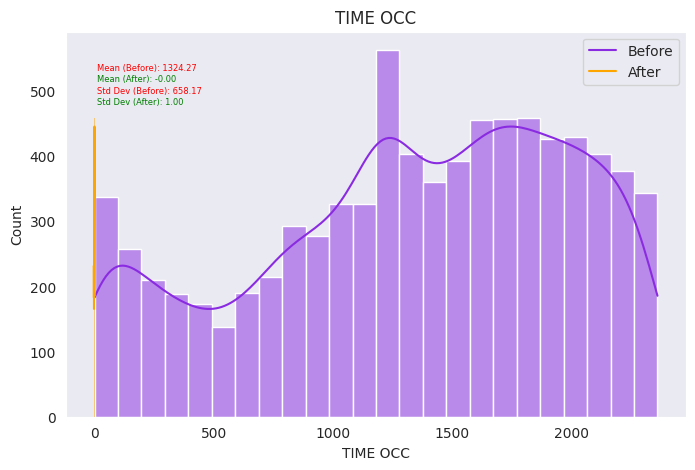

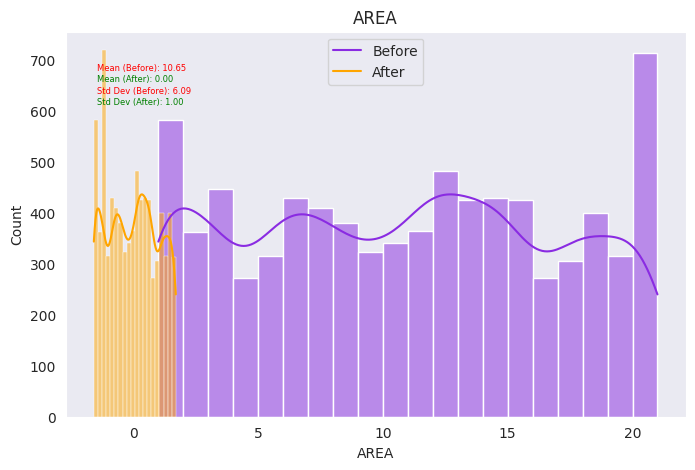

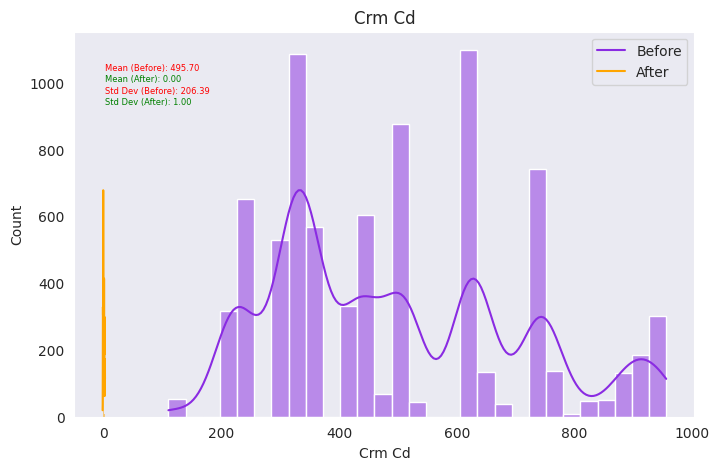

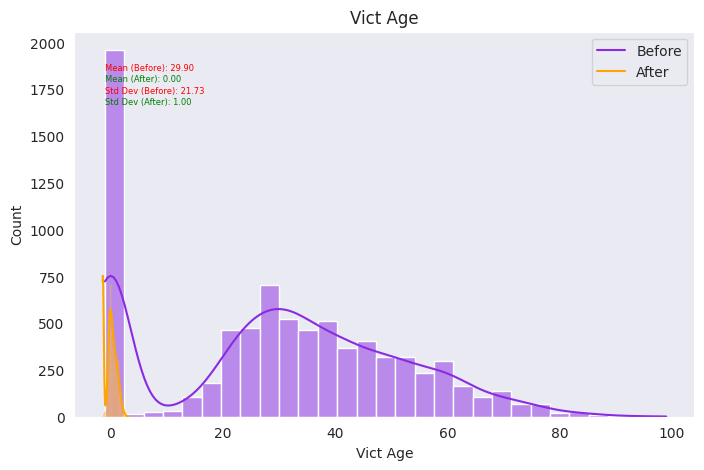

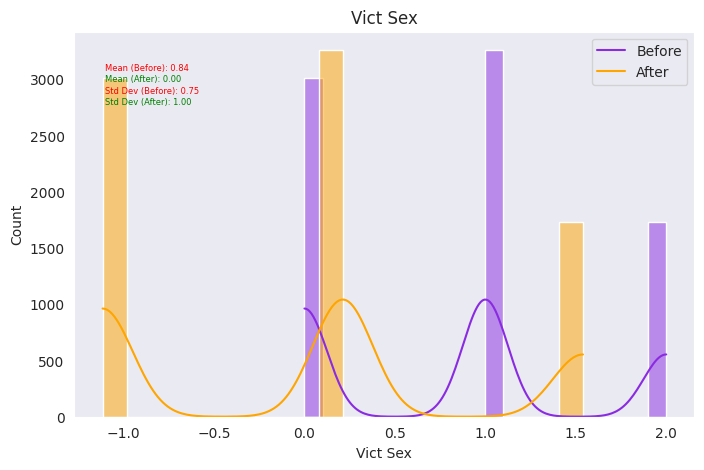

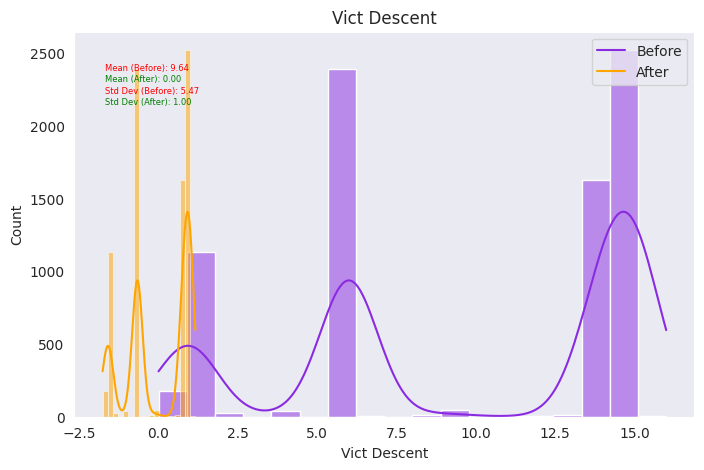

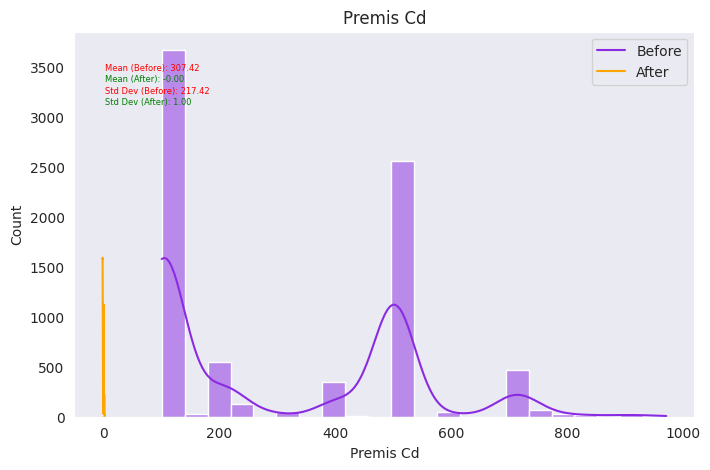

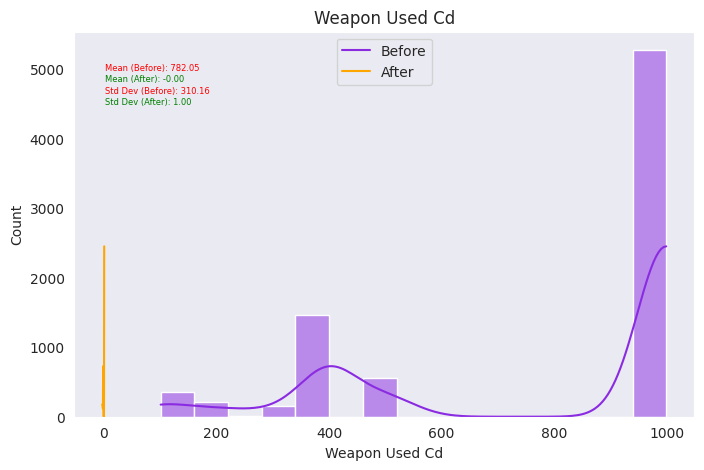

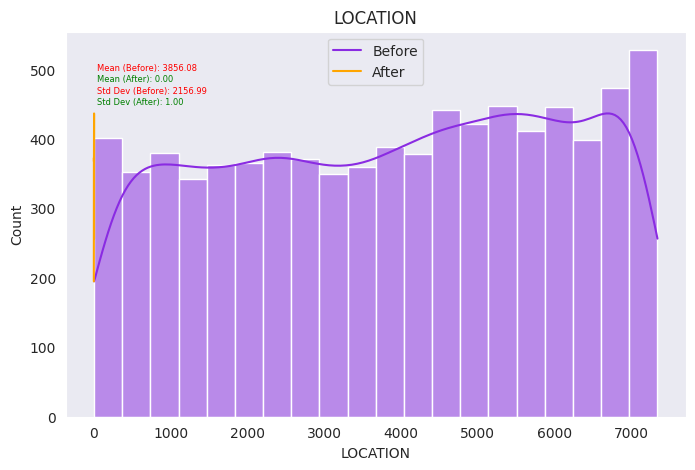

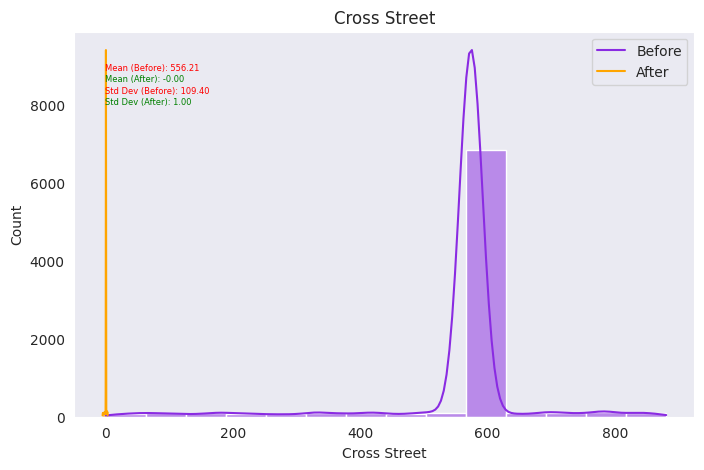

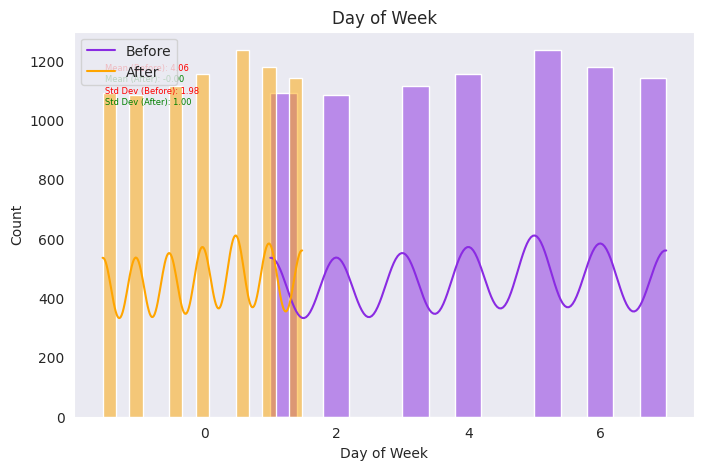

In [15]:
# Difference before and after StandardScaler()
for col in X_train.columns:

    # Plot the histograms
    fig, axes = plt.subplots(figsize=(8,5))
    sns.histplot(data=X_train, x=col, kde=True, color='#8A2BE2', ax=axes)
    sns.histplot(data=X_train_scaled, x=col, kde=True, color='#FFA500', ax=axes)
    
    # Set plot title and legend
    axes.set_title(f"{col}")
    axes.legend(labels=['Before', 'After'])
    
    # Calculate and Display the mean on the plot
    mean_before = X_train[col].mean()
    mean_after = X_train_scaled[col].mean()
    axes.text(0.05, 0.9, f"Mean (Before): {mean_before:.2f}", transform=axes.transAxes, fontsize=6, color='red')
    axes.text(0.05, 0.87, f"Mean (After): {mean_after:.2f}", transform=axes.transAxes, fontsize=6, color='green')
    
    # Calculate and Display the standard deviation on the plot
    std_before = X_train[col].std()
    std_after = X_train_scaled[col].std()
    axes.text(0.05, 0.84, f"Std Dev (Before): {std_before:.2f}", transform=axes.transAxes, fontsize=6, color='red')
    axes.text(0.05, 0.81, f"Std Dev (After): {std_after:.2f}", transform=axes.transAxes, fontsize=6, color='green')
    
    # Show the plot
    plt.show()
    print("\n\n")

### Feature Selection 

* to obtain a process to select the relevant features for fitting the ML model
    * fewer and more relevant features = easier to interpret
    * no overfitting (normally)
    * time to train and feature space are reduced

* Using Embedded method (could also use Filter Method or Wrapper Method)
    * performs feature selection during training, finds the feature subset for the algorithm that is being trained
    * derives feature importance from the trained ML model, removing non-relevant features using the derived feature importance


In [16]:
# Using SelectFromModel()
from sklearn.feature_selection import SelectFromModel

# Using Decision Tree algorithm
from sklearn.tree import DecisionTreeClassifier

# Create Pipeline
pipeline = Pipeline([
    ("ScaleMeGood", StandardScaler()),
    ("SelectMeGood", SelectFromModel(DecisionTreeClassifier(random_state=77))),
    ("ModelMeGood", DecisionTreeClassifier(random_state=77))
])

pipeline

Pipeline(steps=[('ScaleMeGood', StandardScaler()),
                ('SelectMeGood',
                 SelectFromModel(estimator=DecisionTreeClassifier(random_state=77))),
                ('ModelMeGood', DecisionTreeClassifier(random_state=77))])

In [17]:
# Fitting the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('ScaleMeGood', StandardScaler()),
                ('SelectMeGood',
                 SelectFromModel(estimator=DecisionTreeClassifier(random_state=77))),
                ('ModelMeGood', DecisionTreeClassifier(random_state=77))])

In [18]:
# Access which features were selected
X_train.columns[pipeline['SelectMeGood'].get_support()]

Index(['Crm Cd', 'Weapon Used Cd'], dtype='object')

---

## Predictions

In [19]:
# Using .predict() and parse the test set features (X_test)
ModelMeVeryGood = DecisionTreeClassifier()
ModelMeVeryGood.fit(X_train_scaled, y_train)
ModelMeVeryGood.predict(X_test_scaled)

array([20000., 20000., 10000., ..., 10000.,   950., 10000.])

In [20]:
# Using .predict_proba() to predict probability (between 0 and 1) for each class for a given observation
ModelMeVeryGood.predict_proba(X_test_scaled)

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

---

# Push files to the repo

* Train Set
* Test Set
* Modeling pipeline
* label map
* features importance plot

In [53]:
import joblib
import os

# Define the version for the saved file
version = 'v1'

# Create the file path where the model will be saved
file_path = f'outputs/ml_pipeline/predict_amount/{version}'

# Try to create the directory if it does not exist
try:
  os.makedirs(name=file_path)
except Exception as e:
    # If the directory already exists or there's another issue, print the exception
  print(e)

In [54]:
# to save the model See "Save your model" at the End of Scikit-Learn Unit 2
joblib.dump(value=pipeline, filename=f"{file_path}/v1_pipeline_reg_amount.pkl")

['outputs/ml_pipeline/predict_amount/v1/v1_pipeline_reg_amount.pkl']

In [55]:
# to load it 
loaded_model = joblib.load(filename='outputs/ml_pipeline/predict_amount/v1/v1_pipeline_reg_amount.pkl')
loaded_model

Pipeline(steps=[('ScaleMeGood', StandardScaler()),
                ('SelectMeGood',
                 SelectFromModel(estimator=DecisionTreeClassifier(random_state=77))),
                ('ModelMeGood', DecisionTreeClassifier(random_state=77))])

---

# Linear Regression

Our target is the amount of damage, which is a continuous variable. We will create a pipeline to handle that.

In [21]:
# ML aLgorithms
from sklearn.linear_model import LinearRegression

def pipeline_linear_regression():
    pipeline = Pipeline([
        ("ScaleMeGoodLinReg", StandardScaler()),
        ("SelectMeGoodLinReg", SelectFromModel(LinearRegression())),
        ("ModelMeGoodLinReg", LinearRegression())
    ])
    return pipeline

pipeline_linear_regression()

Pipeline(steps=[('ScaleMeGoodLinReg', StandardScaler()),
                ('SelectMeGoodLinReg',
                 SelectFromModel(estimator=LinearRegression())),
                ('ModelMeGoodLinReg', LinearRegression())])

In [22]:
# We fit the train set (X_train and y_train)
pipeline2 = pipeline_linear_regression()
pipeline2.fit(X_train, y_train)

Pipeline(steps=[('ScaleMeGoodLinReg', StandardScaler()),
                ('SelectMeGoodLinReg',
                 SelectFromModel(estimator=LinearRegression())),
                ('ModelMeGoodLinReg', LinearRegression())])

## Evaluation, linear model coefficients, by extracting from the model attribute .coef_

In [23]:
# Function for Evaluating
def linear_model_coefficients(model, columns):
    print(f"* Interception: {model.intercept_}")

    # Flatten the coefficients array if necessary
    coef = model.coef_.flatten() if model.coef_.ndim > 1 else model.coef_
    
    # Create a DataFrame with the correct shape
    coeff_df = (pd.DataFrame(coef, columns, columns=['Coefficient']).sort_values(['Coefficient'], key=abs, ascending=False))
    print("* Coefficients")
    print(coeff_df)

In [24]:
# Parsing the model only
pipeline2['ModelMeGoodLinReg']

LinearRegression()

In [25]:
# Subset the boolean array that tells which features hit the model
pipeline2['SelectMeGoodLinReg'].get_support()

array([False, False,  True,  True,  True, False,  True,  True, False,
       False, False])

In [26]:
# Parse this array to train set columns
X_train.columns[pipeline2['SelectMeGoodLinReg'].get_support()]

Index(['Crm Cd', 'Vict Age', 'Vict Sex', 'Premis Cd', 'Weapon Used Cd'], dtype='object')

In [27]:
# Learning the model coefficients, intercept and beta coefficients because it is a multiple linear regression since there are multiple features hitting the model
linear_model_coefficients(model=pipeline2['ModelMeGoodLinReg'], columns=X_train.columns[pipeline2['SelectMeGoodLinReg'].get_support()])

* Interception: [5144.434]
* Coefficients
                Coefficient
Vict Sex        2121.236355
Weapon Used Cd  2088.467370
Crm Cd         -1888.755346
Vict Age        -980.197868
Premis Cd       -846.156123


It looks like 'Vict Sex' has the highest absolute value. It indicates that it is the most important feature.

### Evaluating how good the pipeline fits the train and test set

In [28]:
# import regression metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

def regression_performance(X_train, y_train, X_test, y_test, pipeline2):
    """
    # Gets train and test sets
    # Gets pipeline2
    # Evaluate the performance
    # for each set call regression_evaluation()
    """
    print("Model Evaluation \n")
    print("* Train Set")
    regression_evaluation(X_train, y_train, pipeline2)
    print("* Test Set")
    regression_evaluation(X_test, y_test, pipeline2)


def regression_evaluation(X, y, pipeline2):
    """
    # Gets features and target and pipeline2
    # Predicts using pipeline and features
    # Calculates performance metrics comparing prediction to target
    """
    prediction = pipeline2.predict(X)
    print('R2 Score:', r2_score(y, prediction).round(3))
    print('Mean Absolute Error:', mean_absolute_error(y, prediction).round(3))
    print('Mean Squared Error:', mean_squared_error(y, prediction).round(3))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y, prediction)).round(3))
    print("\n")

def regression_evaluation_plots_with_residuals(X_train, y_train, X_test, y_test, pipeline2, alpha_scatter=0.5):
    """
    two plots:
    1. Actual vs Prediction scatterplots both train and test
    2. Residuals plots for train and test (Residuals = Actual - Predicted)
    A good model should have residuals randomly scattered around zero.
    """

    # Ensure y_train and y_test are 1-dimensional
    y_train = y_train.squeeze() if hasattr(y_train, 'squeeze') else y_train
    y_test = y_test.squeeze() if hasattr(y_test, 'squeeze') else y_test

    # Predictions for train and test
    pred_train = pipeline2.predict(X_train).ravel()
    pred_test = pipeline2.predict(X_test).ravel()

    # Residuals for train and test
    residuals_train = y_train - pred_train
    residuals_test = y_test - pred_test

    # Create the subplots for Actual vs Prediction and Residuals Plot
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

    # Actual vs Prediction scatterplot for Train Set
    sns.scatterplot(x=y_train, y=pred_train, alpha=alpha_scatter, ax=axes[0, 0])
    sns.lineplot(x=y_train, y=y_train, color='red', ax=axes[0, 0])
    axes[0, 0].set_xlabel("Actual")
    axes[0, 0].set_ylabel("Predictions")
    axes[0, 0].set_title("Actual vs Prediction (Train Set)")

    # Actual vs Prediction scatterplot for Test Set
    sns.scatterplot(x=y_test, y=pred_test, alpha=alpha_scatter, ax=axes[0, 1])
    sns.lineplot(x=y_test, y=y_test, color='red', ax=axes[0, 1])
    axes[0, 1].set_xlabel("Actual")
    axes[0, 1].set_ylabel("Predictions")
    axes[0, 1].set_title("Actual vs Prediction (Test Set)") 

    # Residuals plot for Train Set
    sns.scatterplot(x=pred_train, y=residuals_train, alpha=alpha_scatter, ax=axes[1, 0])
    sns.lineplot(x=pred_train, y=[0] * len(pred_train), color='red', ax=axes[1, 0])
    axes[1, 0].set_xlabel("Predictions")
    axes[1, 0].set_ylabel("Residuals")
    axes[1, 0].set_title("Residuals Plot (Train Set)") 

    # Residuals plot for Test Set
    sns.scatterplot(x=pred_test, y=residuals_test, alpha=alpha_scatter, ax=axes[1, 1])
    sns.lineplot(x=pred_test, y=[0] * len(pred_test), color='red', ax=axes[1, 1])
    axes[1, 1].set_xlabel("Predictions")
    axes[1, 1].set_ylabel("Residuals")
    axes[1, 1].set_title("Residuals Plot (Test Set)") 

    # Display
    plt.tight_layout()
    plt.show()

### Using the custom regression evaluation function

Model Evaluation 

* Train Set
R2 Score: 0.339
Mean Absolute Error: 5104.645
Mean Squared Error: 39678399.954
Root Mean Squared Error: 6299.079


* Test Set
R2 Score: 0.328
Mean Absolute Error: 5303.435
Mean Squared Error: 42326709.425
Root Mean Squared Error: 6505.898




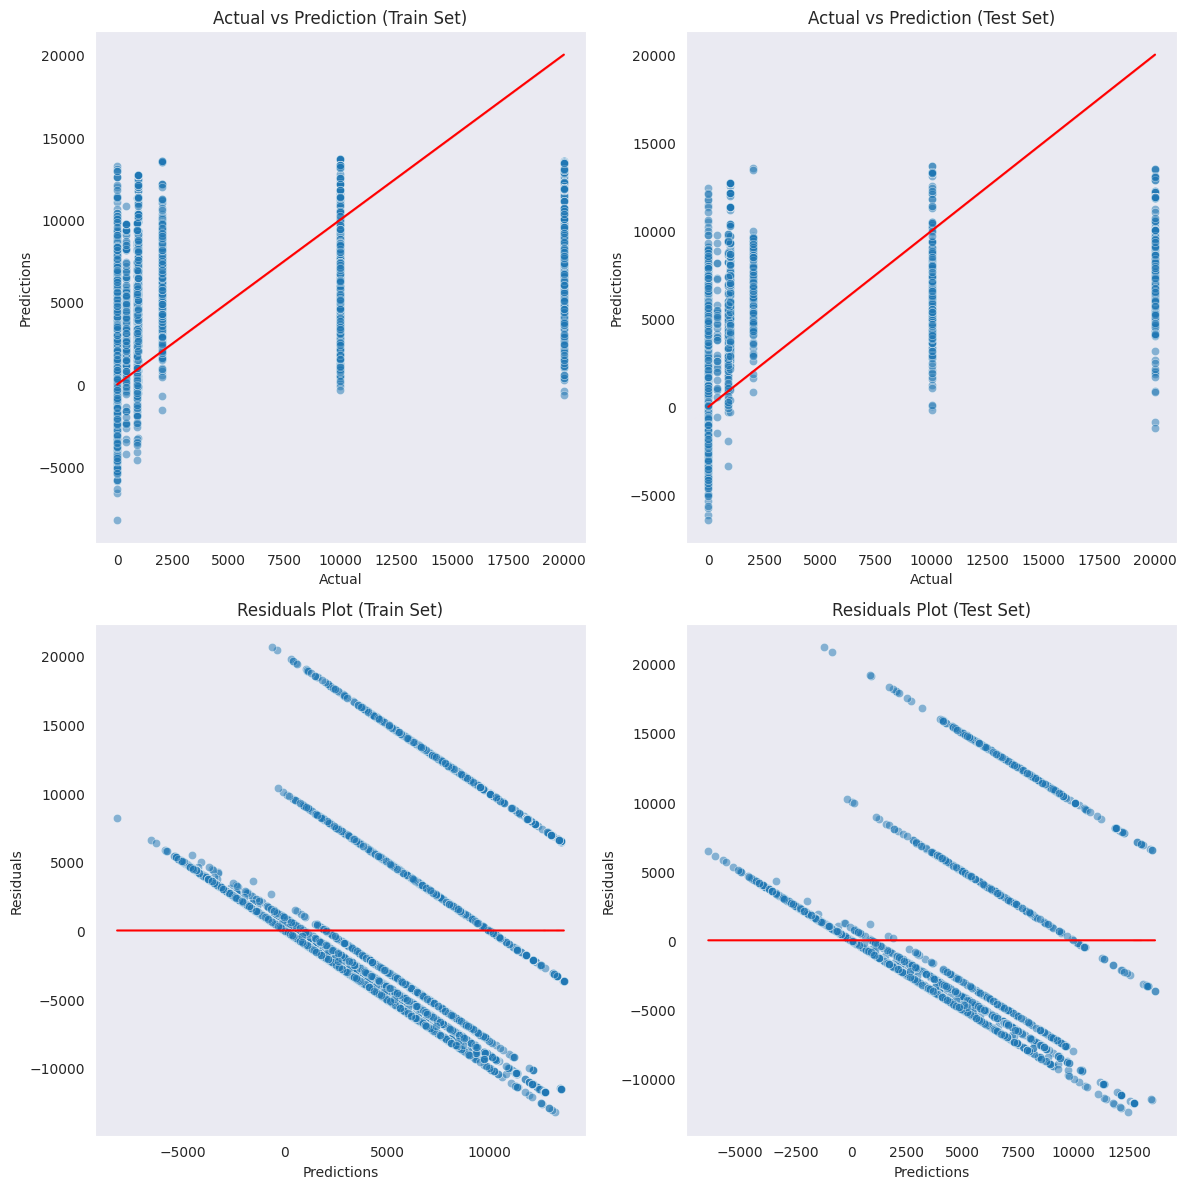

In [29]:
regression_performance(X_train, y_train, X_test, y_test, pipeline2)
regression_evaluation_plots_with_residuals(X_train, y_train, X_test, y_test, pipeline2, alpha_scatter=0.5)

### Summary and Observations:

* The R2 score shows that the model explains abot 33-34% of the variance in the target variable.
* The MAE, MSE, RMSE metrics are all fairly consistent between the training and test sets, indicating that the model is not overfitting.
* The errors are large (around 5100 - 5300 units for MAE and 6300-6500 units for RMSE), indicating that the model may benefit from further refinement

Possible improvement: feature engineering, model tuning, different algorithms

---

# Tree-based models for Regression

We will be using:
* Random Forest, Ada Boost, Extra Tree

### Random Forest

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

def pipeline_random_forest_reg():
    pipeline3 = Pipeline([
        ("ScaleMeGoodRanForReg", StandardScaler()),
        ("SelectMeGoodRanForReg", SelectFromModel(RandomForestRegressor(random_state=77))),
        ("ModelMeGoodRanForReg", RandomForestRegressor(random_state=77)),
    ])
    return pipeline3

pipeline_random_forest_reg()

Pipeline(steps=[('ScaleMeGoodRanForReg', StandardScaler()),
                ('SelectMeGoodRanForReg',
                 SelectFromModel(estimator=RandomForestRegressor(random_state=77))),
                ('ModelMeGoodRanForReg',
                 RandomForestRegressor(random_state=77))])

In [31]:
# Fit the pipeline
pipeline3 = pipeline_random_forest_reg()
pipeline3.fit(X_train, y_train)

/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('ScaleMeGoodRanForReg', StandardScaler()),
                ('SelectMeGoodRanForReg',
                 SelectFromModel(estimator=RandomForestRegressor(random_state=77))),
                ('ModelMeGoodRanForReg',
                 RandomForestRegressor(random_state=77))])

In [32]:
# Evaluate the pipeline using .features_importance_
def feature_importance_random_forest(model, columns):
    # Create DataFrame to display feature importance
    df_feature_importance = (pd.DataFrame(data={
        'Features': columns,
      'Importance': model.feature_importances_})
  .sort_values(by='Importance', ascending=False)
  )
    best_features = df_feature_importance['Features'].to_list()

    # Most important features statement and plot
    print(f"* These are the {len(best_features)} most important features in descending order. " f"The model was trained on them: \n{df_feature_importance['Features'].to_list()}")

    df_feature_importance.plot(kind='bar', x='Features', y='Importance')
    plt.show()

* These are the 2 most important features in descending order. The model was trained on them: 
['Crm Cd', 'Vict Sex']


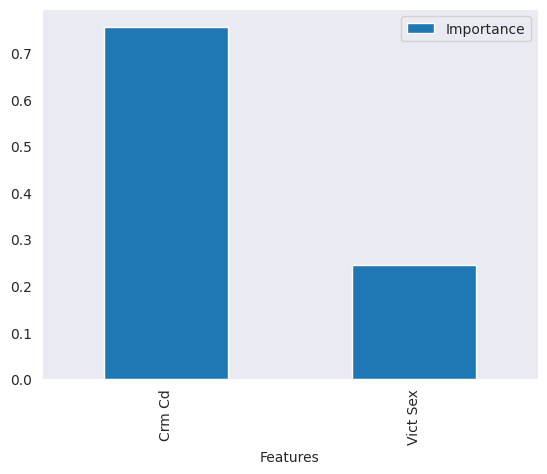

In [33]:
feature_importance_random_forest(model = pipeline3['ModelMeGoodRanForReg'],
                                     columns =  X_train.columns[pipeline3['SelectMeGoodRanForReg'].get_support()]
                                     )

### Evaluating how good the pipeline fits the train and test set

In [35]:
# import regression metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

def randfor_regression_performance(X_train, y_train, X_test, y_test, pipeline3):
    """
    # Gets train and test sets
    # Gets pipeline3
    # Evaluate the performance
    # for each set call regression_evaluation()
    """
    print("Model Evaluation \n")
    print("* Train Set")
    regression_evaluation(X_train, y_train, pipeline3)
    print("* Test Set")
    regression_evaluation(X_test, y_test, pipeline3)


def randfor_regression_evaluation(X, y, pipeline3):
    """
    # Gets features and target and pipeline3
    # Predicts using pipeline3 and features
    # Calculates performance metrics comparing prediction to target
    """
    prediction = pipeline3.predict(X)
    print('R2 Score:', r2_score(y, prediction).round(3))
    print('Mean Absolute Error:', mean_absolute_error(y, prediction).round(3))
    print('Mean Squared Error:', mean_squared_error(y, prediction).round(3))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y, prediction)).round(3))
    print("\n")

def randfor_regression_evaluation_plots_with_residuals(X_train, y_train, X_test, y_test, pipeline3, alpha_scatter=0.5):
    """
    two plots:
    1. Actual vs Prediction scatterplots both train and test
    2. Residuals plots for train and test (Residuals = Actual - Predicted)
    A good model should have residuals randomly scattered around zero.
    """

    # Ensure y_train and y_test are 1-dimensional
    y_train = y_train.squeeze() if hasattr(y_train, 'squeeze') else y_train
    y_test = y_test.squeeze() if hasattr(y_test, 'squeeze') else y_test

    # Predictions for train and test
    pred_train = pipeline3.predict(X_train).ravel()
    pred_test = pipeline3.predict(X_test).ravel()

    # Residuals for train and test
    residuals_train = y_train - pred_train
    residuals_test = y_test - pred_test

    # Create the subplots for Actual vs Prediction and Residuals Plot
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

    # Actual vs Prediction scatterplot for Train Set
    sns.scatterplot(x=y_train, y=pred_train, alpha=alpha_scatter, ax=axes[0, 0])
    sns.lineplot(x=y_train, y=y_train, color='red', ax=axes[0, 0])
    axes[0, 0].set_xlabel("Actual")
    axes[0, 0].set_ylabel("Predictions")
    axes[0, 0].set_title("Actual vs Prediction (Train Set)")

    # Actual vs Prediction scatterplot for Test Set
    sns.scatterplot(x=y_test, y=pred_test, alpha=alpha_scatter, ax=axes[0, 1])
    sns.lineplot(x=y_test, y=y_test, color='red', ax=axes[0, 1])
    axes[0, 1].set_xlabel("Actual")
    axes[0, 1].set_ylabel("Predictions")
    axes[0, 1].set_title("Actual vs Prediction (Test Set)") 

    # Residuals plot for Train Set
    sns.scatterplot(x=pred_train, y=residuals_train, alpha=alpha_scatter, ax=axes[1, 0])
    sns.lineplot(x=pred_train, y=[0] * len(pred_train), color='red', ax=axes[1, 0])
    axes[1, 0].set_xlabel("Predictions")
    axes[1, 0].set_ylabel("Residuals")
    axes[1, 0].set_title("Residuals Plot (Train Set)") 

    # Residuals plot for Test Set
    sns.scatterplot(x=pred_test, y=residuals_test, alpha=alpha_scatter, ax=axes[1, 1])
    sns.lineplot(x=pred_test, y=[0] * len(pred_test), color='red', ax=axes[1, 1])
    axes[1, 1].set_xlabel("Predictions")
    axes[1, 1].set_ylabel("Residuals")
    axes[1, 1].set_title("Residuals Plot (Test Set)") 

    # Display
    plt.tight_layout()
    plt.show()

### Using the custom regression evaluation function

Model Evaluation 

* Train Set
R2 Score: 0.998
Mean Absolute Error: 26.979
Mean Squared Error: 131785.473
Root Mean Squared Error: 363.023


* Test Set
R2 Score: 0.998
Mean Absolute Error: 31.233
Mean Squared Error: 120442.329
Root Mean Squared Error: 347.048




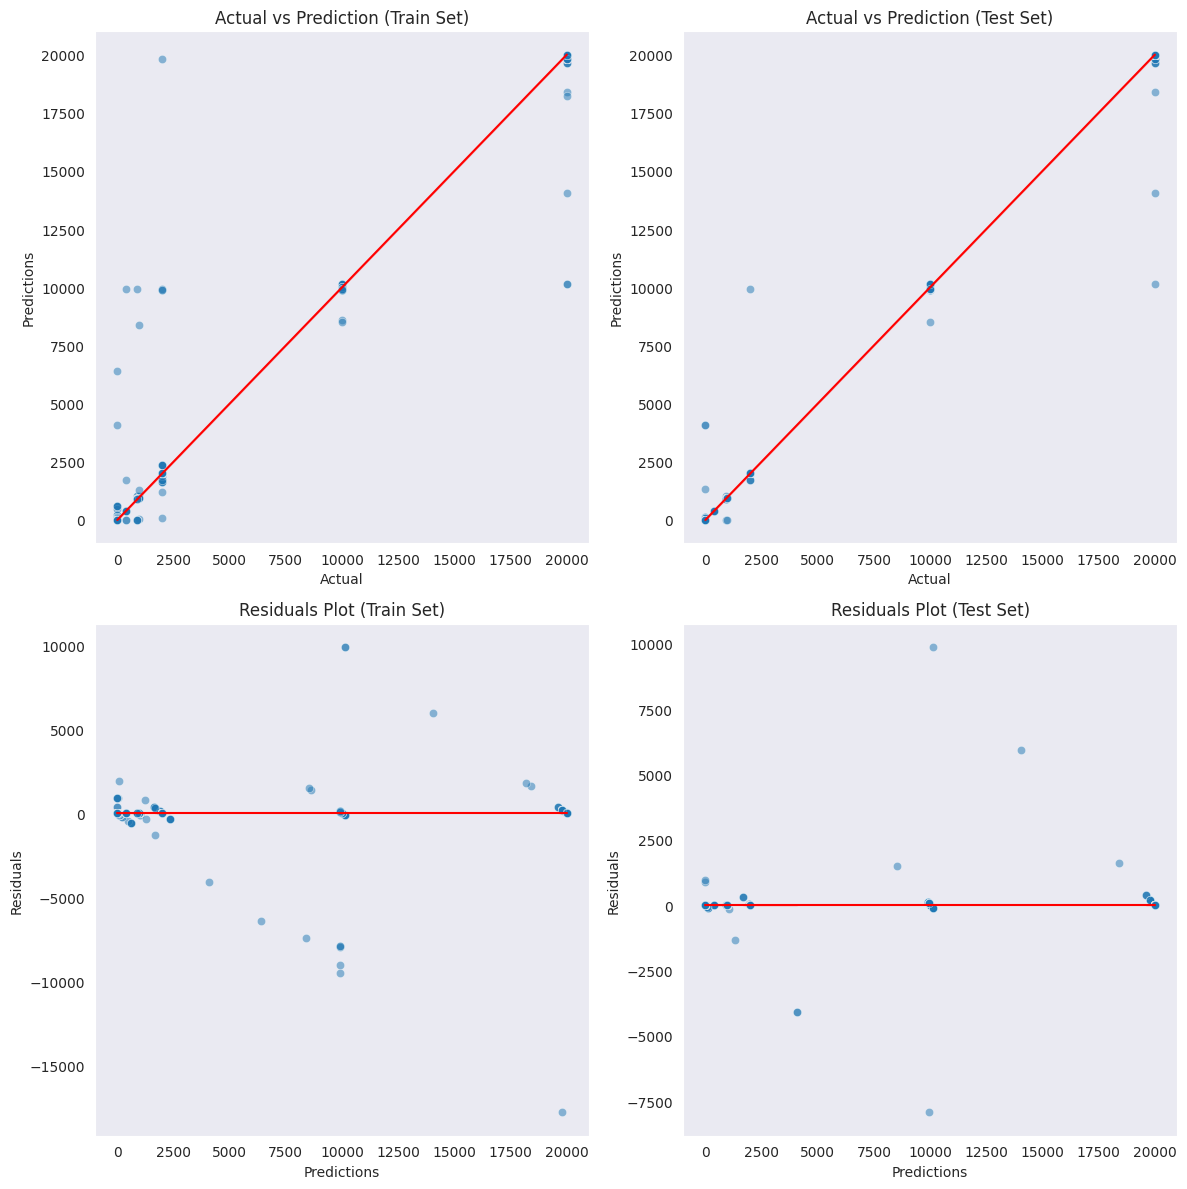

In [36]:
randfor_regression_performance(X_train, y_train, X_test, y_test, pipeline3)
randfor_regression_evaluation_plots_with_residuals(X_train, y_train, X_test, y_test, pipeline3, alpha_scatter=0.5)


### Summary and Observations:

* The R2 score of 0.998 on both train and test sets indicates that the random forest model is doing a good job of capturing the relationship between the features and the target variable.
* The minimal difference in term of MAE, MSE, and RMSE between training and test sets suggests that the model generalizes very well to unseen data. There is no indication of overfitting. 
* The errors are small (around 27 - 31 units for MAE and 347-363 units for RMSE), indicating that the model makes accurate predictions with minimal deviation from actual values.

Possible improvement: Hyperparameter Tuning like Grid Search or Random Search combined with cross-validation. Increasing or decreasing the number of trees. Limiting tree depth to prevent overfitting. Minimum samples per leaf or split. Cross-validation. Feature importance and selection. Stacking multiple models or using boosting methods.

### Ada Boost

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostRegressor

def pipeline_ada_boost_reg():
    pipeline4 = Pipeline([
        ("ScaleMeGoodAdaBoostReg", StandardScaler()),
        ("SelectMeGoodAdaBoostReg", SelectFromModel(AdaBoostRegressor(random_state=77))),
        ("ModelMeGoodAdaBoostReg", AdaBoostRegressor(random_state=77)),
    ])
    return pipeline4

pipeline_ada_boost_reg()

Pipeline(steps=[('ScaleMeGoodAdaBoostReg', StandardScaler()),
                ('SelectMeGoodAdaBoostReg',
                 SelectFromModel(estimator=AdaBoostRegressor(random_state=77))),
                ('ModelMeGoodAdaBoostReg', AdaBoostRegressor(random_state=77))])

In [38]:
# Fit the model
pipeline4 = pipeline_ada_boost_reg()
pipeline4.fit(X_train, y_train)

/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('ScaleMeGoodAdaBoostReg', StandardScaler()),
                ('SelectMeGoodAdaBoostReg',
                 SelectFromModel(estimator=AdaBoostRegressor(random_state=77))),
                ('ModelMeGoodAdaBoostReg', AdaBoostRegressor(random_state=77))])

In [39]:
# Evaluate the pipeline using .features_importance_
def feature_importance_ada_boost(model, columns):
    # Create DataFrame to display feature importance
    df_feature_importance = (pd.DataFrame(data={
        'Features': columns,
      'Importance': model.feature_importances_})
  .sort_values(by='Importance', ascending=False)
  )
    best_features = df_feature_importance['Features'].to_list()

    # Most important features statement and plot
    print(f"* These are the {len(best_features)} most important features in descending order. " f"The model was trained on them: \n{df_feature_importance['Features'].to_list()}")

    df_feature_importance.plot(kind='bar', x='Features', y='Importance')
    plt.show()

* These are the 2 most important features in descending order. The model was trained on them: 
['Crm Cd', 'Vict Sex']


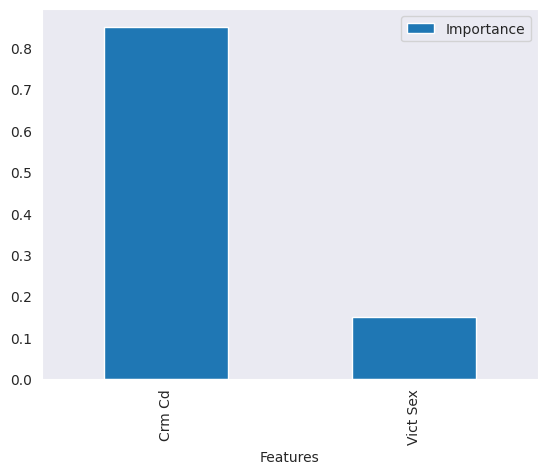

In [40]:
feature_importance_ada_boost(model = pipeline4['ModelMeGoodAdaBoostReg'],
                                     columns =  X_train.columns[pipeline4['SelectMeGoodAdaBoostReg'].get_support()]
                                     )

### Evaluating how good the pipeline fits the train and test set

In [41]:
# import regression metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

def ada_boost_regression_performance(X_train, y_train, X_test, y_test, pipeline4):
    """
    # Gets train and test sets
    # Gets pipeline4
    # Evaluate the performance
    # for each set call regression_evaluation()
    """
    print("Model Evaluation \n")
    print("* Train Set")
    regression_evaluation(X_train, y_train, pipeline4)
    print("* Test Set")
    regression_evaluation(X_test, y_test, pipeline4)


def ada_boost_regression_evaluation(X, y, pipeline4):
    """
    # Gets features and target and pipeline4
    # Predicts using pipeline4 and features
    # Calculates performance metrics comparing prediction to target
    """
    prediction = pipeline4.predict(X)
    print('R2 Score:', r2_score(y, prediction).round(3))
    print('Mean Absolute Error:', mean_absolute_error(y, prediction).round(3))
    print('Mean Squared Error:', mean_squared_error(y, prediction).round(3))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y, prediction)).round(3))
    print("\n")

def ada_boost_regression_evaluation_plots_with_residuals(X_train, y_train, X_test, y_test, pipeline4, alpha_scatter=0.5):
    """
    two plots:
    1. Actual vs Prediction scatterplots both train and test
    2. Residuals plots for train and test (Residuals = Actual - Predicted)
    A good model should have residuals randomly scattered around zero.
    """

    # Ensure y_train and y_test are 1-dimensional
    y_train = y_train.squeeze() if hasattr(y_train, 'squeeze') else y_train
    y_test = y_test.squeeze() if hasattr(y_test, 'squeeze') else y_test

    # Predictions for train and test
    pred_train = pipeline4.predict(X_train).ravel()
    pred_test = pipeline4.predict(X_test).ravel()

    # Residuals for train and test
    residuals_train = y_train - pred_train
    residuals_test = y_test - pred_test

    # Create the subplots for Actual vs Prediction and Residuals Plot
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

    # Actual vs Prediction scatterplot for Train Set
    sns.scatterplot(x=y_train, y=pred_train, alpha=alpha_scatter, ax=axes[0, 0])
    sns.lineplot(x=y_train, y=y_train, color='red', ax=axes[0, 0])
    axes[0, 0].set_xlabel("Actual")
    axes[0, 0].set_ylabel("Predictions")
    axes[0, 0].set_title("Actual vs Prediction (Train Set)")

    # Actual vs Prediction scatterplot for Test Set
    sns.scatterplot(x=y_test, y=pred_test, alpha=alpha_scatter, ax=axes[0, 1])
    sns.lineplot(x=y_test, y=y_test, color='red', ax=axes[0, 1])
    axes[0, 1].set_xlabel("Actual")
    axes[0, 1].set_ylabel("Predictions")
    axes[0, 1].set_title("Actual vs Prediction (Test Set)") 

    # Residuals plot for Train Set
    sns.scatterplot(x=pred_train, y=residuals_train, alpha=alpha_scatter, ax=axes[1, 0])
    sns.lineplot(x=pred_train, y=[0] * len(pred_train), color='red', ax=axes[1, 0])
    axes[1, 0].set_xlabel("Predictions")
    axes[1, 0].set_ylabel("Residuals")
    axes[1, 0].set_title("Residuals Plot (Train Set)") 

    # Residuals plot for Test Set
    sns.scatterplot(x=pred_test, y=residuals_test, alpha=alpha_scatter, ax=axes[1, 1])
    sns.lineplot(x=pred_test, y=[0] * len(pred_test), color='red', ax=axes[1, 1])
    axes[1, 1].set_xlabel("Predictions")
    axes[1, 1].set_ylabel("Residuals")
    axes[1, 1].set_title("Residuals Plot (Test Set)") 

    # Display
    plt.tight_layout()
    plt.show()

### Using the custom regression evaluation function

Model Evaluation 

* Train Set
R2 Score: 0.83
Mean Absolute Error: 2368.87
Mean Squared Error: 10207097.079
Root Mean Squared Error: 3194.855


* Test Set
R2 Score: 0.833
Mean Absolute Error: 2366.333
Mean Squared Error: 10536514.59
Root Mean Squared Error: 3246.0




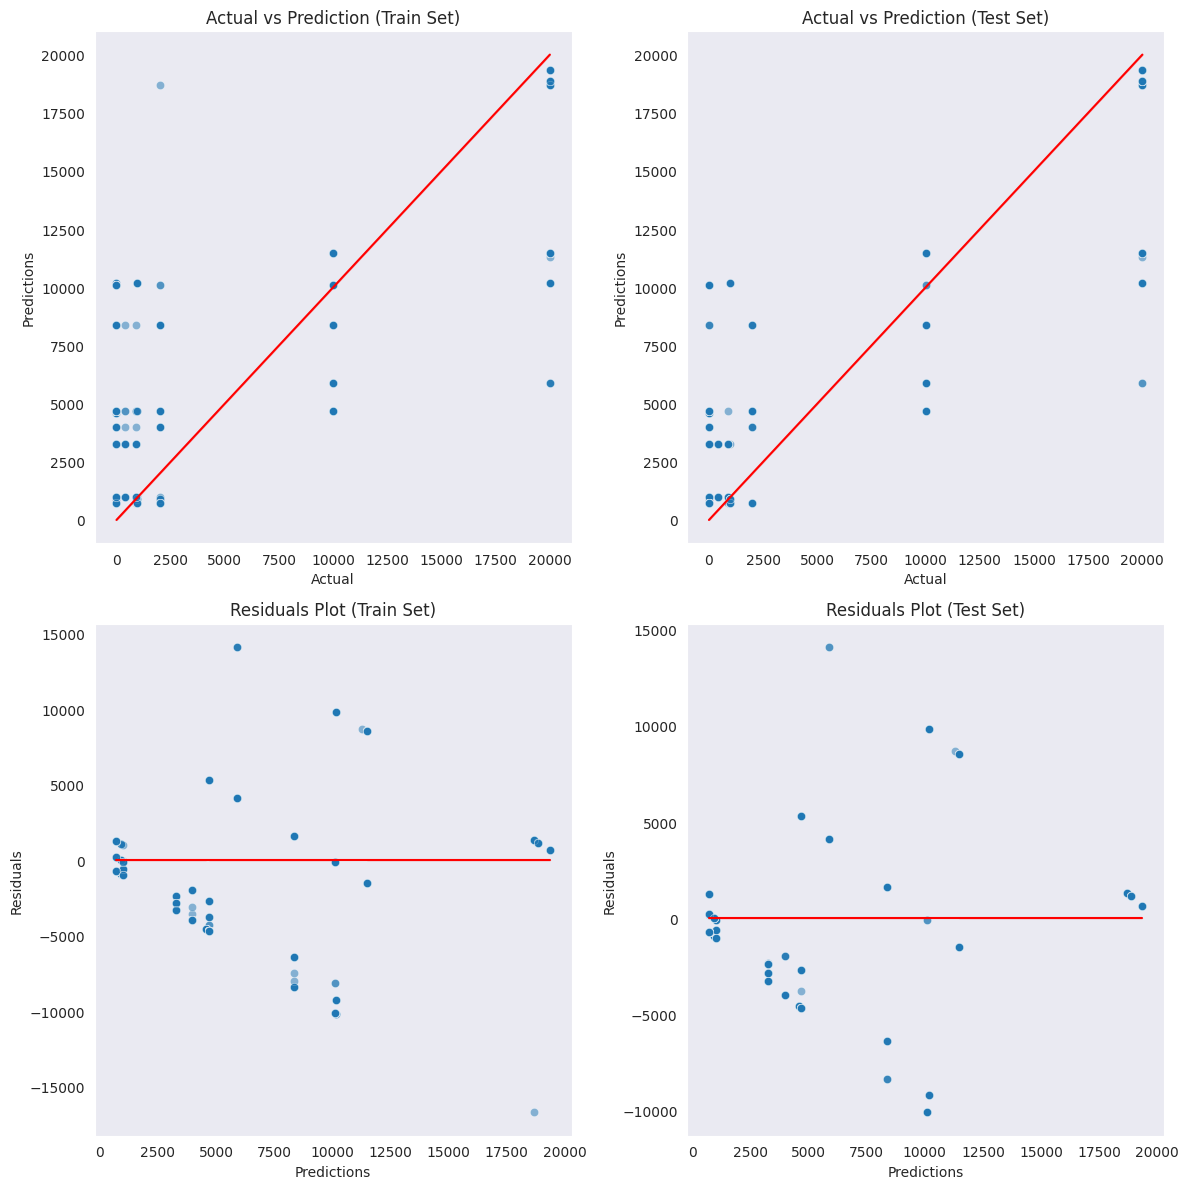

In [42]:
ada_boost_regression_performance(X_train, y_train, X_test, y_test, pipeline4)
ada_boost_regression_evaluation_plots_with_residuals(X_train, y_train, X_test, y_test, pipeline4, alpha_scatter=0.5)

### Summary and Observations:

* The score of the ada_boost is not better than the previous one, random forest.

### Extra Tree (Extremely Randomized Trees)

In [43]:
from sklearn.pipeline import Pipeline

### Feat Scaling
from sklearn.preprocessing import StandardScaler

### Feat Selection
from sklearn.feature_selection import SelectFromModel

### ML aLgrithms
from sklearn.ensemble import ExtraTreesRegressor

def pipeline_extra_tree_reg():
    pipeline5 = Pipeline([
        ("ScaleMeGoodExtraTreeReg", StandardScaler()),
        ("SelectMeGoodExtraTreeReg", SelectFromModel(ExtraTreesRegressor(random_state=77))),
        ("ModelMeGoodExtraTreeReg", ExtraTreesRegressor(random_state=77)),
    ])
    return pipeline5

pipeline_extra_tree_reg()

Pipeline(steps=[('ScaleMeGoodExtraTreeReg', StandardScaler()),
                ('SelectMeGoodExtraTreeReg',
                 SelectFromModel(estimator=ExtraTreesRegressor(random_state=77))),
                ('ModelMeGoodExtraTreeReg',
                 ExtraTreesRegressor(random_state=77))])

In [44]:
# Fit the model
pipeline5 = pipeline_extra_tree_reg()
pipeline5.fit(X_train, y_train)

/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('ScaleMeGoodExtraTreeReg', StandardScaler()),
                ('SelectMeGoodExtraTreeReg',
                 SelectFromModel(estimator=ExtraTreesRegressor(random_state=77))),
                ('ModelMeGoodExtraTreeReg',
                 ExtraTreesRegressor(random_state=77))])

In [46]:
# Evaluate the pipeline using .features_importance_
def feature_importance_extra_tree(model, columns):
    # Create DataFrame to display feature importance
    df_feature_importance = (pd.DataFrame(data={
        'Features': columns,
      'Importance': model.feature_importances_})
  .sort_values(by='Importance', ascending=False)
  )
    best_features = df_feature_importance['Features'].to_list()

    # Most important features statement and plot
    print(f"* These are the {len(best_features)} most important features in descending order. " f"The model was trained on them: \n{df_feature_importance['Features'].to_list()}")

    df_feature_importance.plot(kind='bar', x='Features', y='Importance')
    plt.show()

* These are the 2 most important features in descending order. The model was trained on them: 
['Crm Cd', 'Vict Sex']


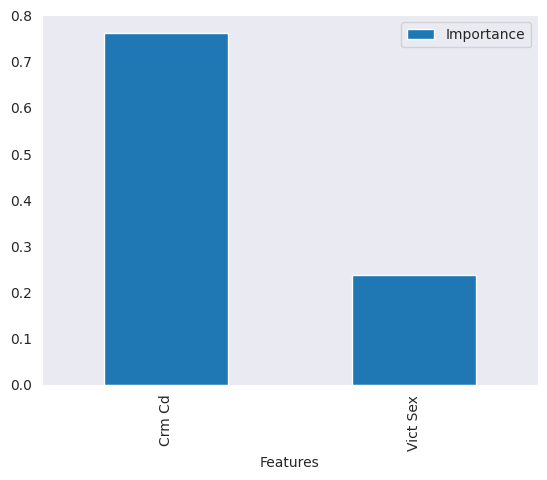

In [47]:
feature_importance_extra_tree(model = pipeline5['ModelMeGoodExtraTreeReg'],
                                     columns =  X_train.columns[pipeline5['SelectMeGoodExtraTreeReg'].get_support()]
                                     )

### Evaluating how good the pipeline fits the train and test set

In [49]:
# import regression metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

def extra_tree_regression_performance(X_train, y_train, X_test, y_test, pipeline5):
    """
    # Gets train and test sets
    # Gets pipeline5
    # Evaluate the performance
    # for each set call regression_evaluation()
    """
    print("Model Evaluation \n")
    print("* Train Set")
    regression_evaluation(X_train, y_train, pipeline5)
    print("* Test Set")
    regression_evaluation(X_test, y_test, pipeline5)


def extra_tree_regression_evaluation(X, y, pipeline5):
    """
    # Gets features and target and pipeline5
    # Predicts using pipeline5 and features
    # Calculates performance metrics comparing prediction to target
    """
    prediction = pipeline5.predict(X)
    print('R2 Score:', r2_score(y, prediction).round(3))
    print('Mean Absolute Error:', mean_absolute_error(y, prediction).round(3))
    print('Mean Squared Error:', mean_squared_error(y, prediction).round(3))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y, prediction)).round(3))
    print("\n")

def extra_tree_regression_evaluation_plots_with_residuals(X_train, y_train, X_test, y_test, pipeline5, alpha_scatter=0.5):
    """
    two plots:
    1. Actual vs Prediction scatterplots both train and test
    2. Residuals plots for train and test (Residuals = Actual - Predicted)
    A good model should have residuals randomly scattered around zero.
    """

    # Ensure y_train and y_test are 1-dimensional
    y_train = y_train.squeeze() if hasattr(y_train, 'squeeze') else y_train
    y_test = y_test.squeeze() if hasattr(y_test, 'squeeze') else y_test

    # Predictions for train and test
    pred_train = pipeline5.predict(X_train).ravel()
    pred_test = pipeline5.predict(X_test).ravel()

    # Residuals for train and test
    residuals_train = y_train - pred_train
    residuals_test = y_test - pred_test

    # Create the subplots for Actual vs Prediction and Residuals Plot
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

    # Actual vs Prediction scatterplot for Train Set
    sns.scatterplot(x=y_train, y=pred_train, alpha=alpha_scatter, ax=axes[0, 0])
    sns.lineplot(x=y_train, y=y_train, color='red', ax=axes[0, 0])
    axes[0, 0].set_xlabel("Actual")
    axes[0, 0].set_ylabel("Predictions")
    axes[0, 0].set_title("Actual vs Prediction (Train Set)")

    # Actual vs Prediction scatterplot for Test Set
    sns.scatterplot(x=y_test, y=pred_test, alpha=alpha_scatter, ax=axes[0, 1])
    sns.lineplot(x=y_test, y=y_test, color='red', ax=axes[0, 1])
    axes[0, 1].set_xlabel("Actual")
    axes[0, 1].set_ylabel("Predictions")
    axes[0, 1].set_title("Actual vs Prediction (Test Set)") 

    # Residuals plot for Train Set
    sns.scatterplot(x=pred_train, y=residuals_train, alpha=alpha_scatter, ax=axes[1, 0])
    sns.lineplot(x=pred_train, y=[0] * len(pred_train), color='red', ax=axes[1, 0])
    axes[1, 0].set_xlabel("Predictions")
    axes[1, 0].set_ylabel("Residuals")
    axes[1, 0].set_title("Residuals Plot (Train Set)") 

    # Residuals plot for Test Set
    sns.scatterplot(x=pred_test, y=residuals_test, alpha=alpha_scatter, ax=axes[1, 1])
    sns.lineplot(x=pred_test, y=[0] * len(pred_test), color='red', ax=axes[1, 1])
    axes[1, 1].set_xlabel("Predictions")
    axes[1, 1].set_ylabel("Residuals")
    axes[1, 1].set_title("Residuals Plot (Test Set)") 

    # Display
    plt.tight_layout()
    plt.show()

### Using the custom regression evaluation function

Model Evaluation 

* Train Set
R2 Score: 0.998
Mean Absolute Error: 22.089
Mean Squared Error: 111442.397
Root Mean Squared Error: 333.83


* Test Set
R2 Score: 0.997
Mean Absolute Error: 27.773
Mean Squared Error: 159706.068
Root Mean Squared Error: 399.632




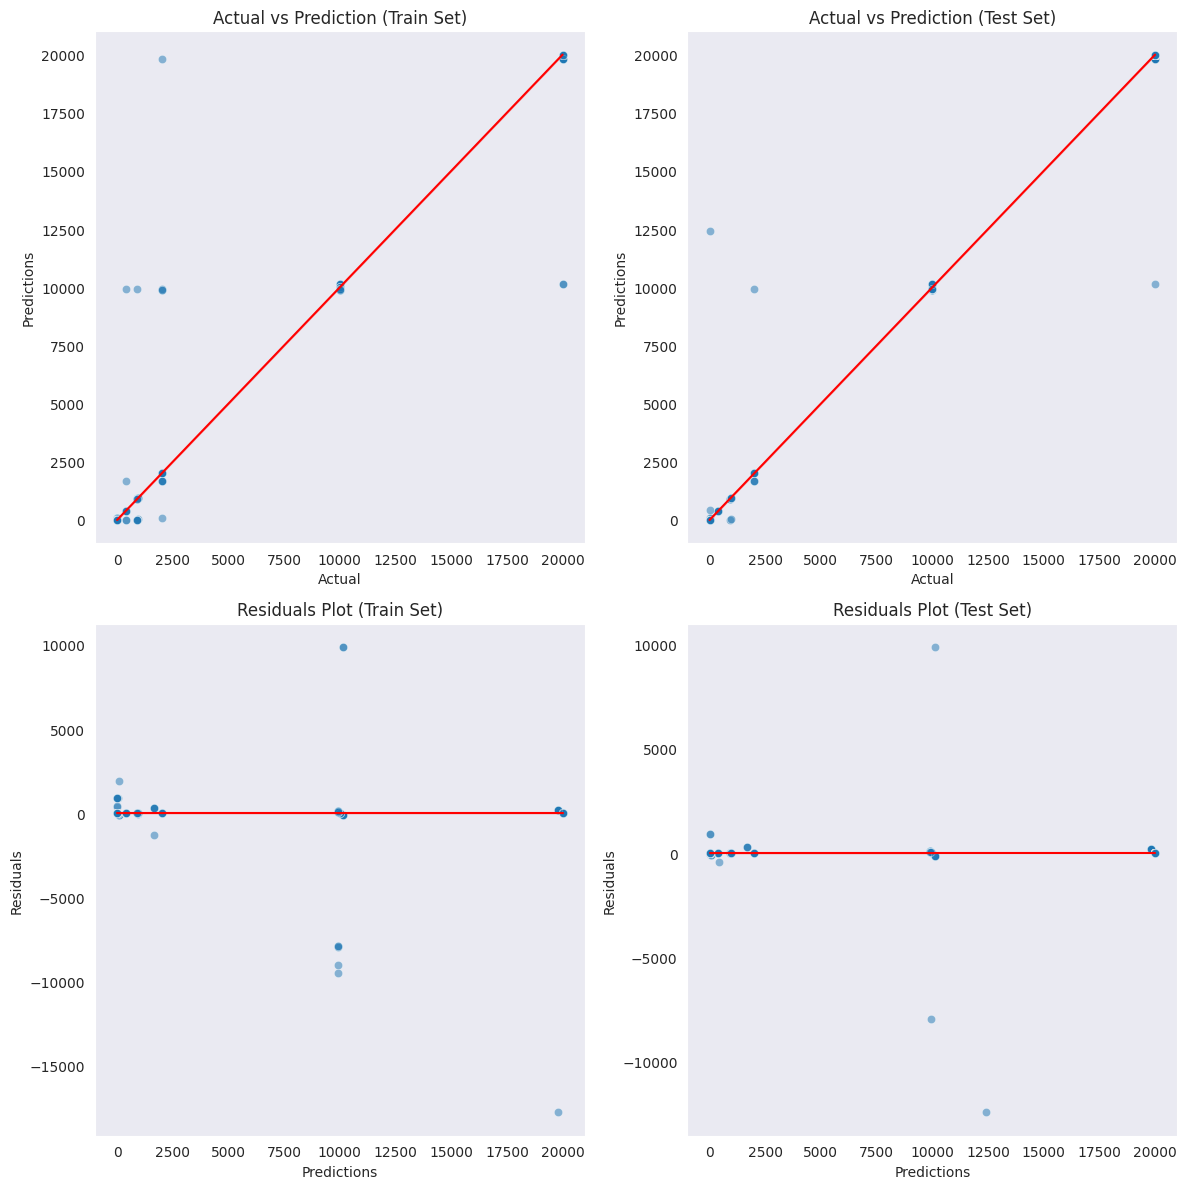

In [50]:
extra_tree_regression_performance(X_train, y_train, X_test, y_test, pipeline5)
extra_tree_regression_evaluation_plots_with_residuals(X_train, y_train, X_test, y_test, pipeline5, alpha_scatter=0.5)

### Summary and Observations:

* if minimizing average prediction errors (MAE) is the priority, the Extra Tree model performs slightly better.
* if reducing large erros (MSE and RMSE) and generalization is more important, Random Forest performs better, especially on the test set.

For predicting damage costs, it's often important to minimize large errors, especially if underestimating or overestimating costs could lead to significatn real-world consequences (e.g. insurance, budgeting). Therefore, we will chose `Random Forest` model.

---

# Cross Validation Search (GridSearchCV) and Hyperparameter Optimization

### GridSearchCV

In [53]:
from sklearn.pipeline import Pipeline

### Feat Scaling
from sklearn.preprocessing import StandardScaler

### Feat Selection
from sklearn.feature_selection import SelectFromModel

### ML aLgorithms
from sklearn.ensemble import RandomForestRegressor

def pipeline_random_forest_reg_CV():
    pipelineCV = Pipeline([
        ("ScaleMeGoodRanForRegCV", StandardScaler()),
        ("SelectMeGoodRanForRegCV", SelectFromModel(RandomForestRegressor(random_state=77))),
        ("ModelMeGoodRanForRegCV", RandomForestRegressor(random_state=77)),
    ])
    return pipelineCV

pipeline_random_forest_reg_CV()

Pipeline(steps=[('ScaleMeGoodRanForRegCV', StandardScaler()),
                ('SelectMeGoodRanForRegCV',
                 SelectFromModel(estimator=RandomForestRegressor(random_state=77))),
                ('ModelMeGoodRanForRegCV',
                 RandomForestRegressor(random_state=77))])

### Parsing the algorithm's hyperparameters in a dictionary

In [54]:
param_grid = {"ModelMeGoodRanForRegCV__n_estimators":[10,20],
              }

param_grid

{'ModelMeGoodRanForRegCV__n_estimators': [10, 20]}

Import GridSearchCV, quick recap of what we will parse:
*  `estimator` as the pipeline, and `param_grid` as the dictionary we stated above. 
* `cv` sets the number of cross-validation you want to try for each selected set of hyperparameters. It uses k-fold cross-validation, where we subdivide the whole dataset into multiple randomly chosen data sets known as k-fold cross-validation where k refers to the number of data sets.  
* `n_jobs`, according to the documentation, is the number of jobs to run in parallel. -1 means using all processors, whereas -2 uses all but one.
* `scoring` is the evaluation metric that you want to use.  That will depend on the ML task you are considering. In this case, it is regression, so we set the R2 score as the metric. Other options would include: `'neg_mean_absolute_error'`, `'neg_mean_squared_error'`
* `verbose`, according to the documentation, controls the verbosity: the higher, the more messages. As this is a teaching example we set it as 3, so you get more information returned about the process.

the validation set is automatically defined using GridSearchCV. You parse the training set and it will subset the validation set as a part of the training set.

In [55]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=pipeline_random_forest_reg_CV(),
                    param_grid=param_grid,
                    cv=2,
                    n_jobs=-2,
                    verbose=3,  # for learning, we set 3 to print the score from every cross-validation
                    scoring='r2')


grid.fit(X_train,y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

[CV 1/2] END ModelMeGoodRanForRegCV__n_estimators=10;, score=0.993 total time=   0.8s
[CV 2/2] END ModelMeGoodRanForRegCV__n_estimators=20;, score=0.992 total time=   0.9s
[CV 1/2] END ModelMeGoodRanForRegCV__n_estimators=20;, score=0.994 total time=   0.8s
[CV 2/2] END ModelMeGoodRanForRegCV__n_estimators=10;, score=0.993 total time=   0.9s


/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('ScaleMeGoodRanForRegCV',
                                        StandardScaler()),
                                       ('SelectMeGoodRanForRegCV',
                                        SelectFromModel(estimator=RandomForestRegressor(random_state=77))),
                                       ('ModelMeGoodRanForRegCV',
                                        RandomForestRegressor(random_state=77))]),
             n_jobs=-2,
             param_grid={'ModelMeGoodRanForRegCV__n_estimators': [10, 20]},
             scoring='r2', verbose=3)

In [56]:
# Results of all models and their respective cross-validations
grid.cv_results_

{'mean_fit_time': array([0.82393312, 0.84055543]),
 'std_fit_time': array([0.03412771, 0.02035832]),
 'mean_score_time': array([0.02500749, 0.01551557]),
 'std_score_time': array([0.0128665 , 0.00062394]),
 'param_ModelMeGoodRanForRegCV__n_estimators': masked_array(data=[10, 20],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'ModelMeGoodRanForRegCV__n_estimators': 10},
  {'ModelMeGoodRanForRegCV__n_estimators': 20}],
 'split0_test_score': array([0.99334755, 0.99364732]),
 'split1_test_score': array([0.99260318, 0.99163287]),
 'mean_test_score': array([0.99297536, 0.99264009]),
 'std_test_score': array([0.00037218, 0.00100722]),
 'rank_test_score': array([1, 2], dtype=int32)}

In [57]:
# Parse this result to a DataFrame sort the values by 'mean_test_score', 
# filter 'parameters' and 'mean_test_score' columns and convert it to an array using .values
(pd.DataFrame(grid.cv_results_).sort_values(by='mean_test_score', ascending=False).filter(['params', 'mean_test_score']).values)

array([[{'ModelMeGoodRanForRegCV__n_estimators': 10}, 0.9929753638584432],
       [{'ModelMeGoodRanForRegCV__n_estimators': 20}, 0.992640094405749]],
      dtype=object)

In [58]:
# Get the best parameters
grid.best_params_

{'ModelMeGoodRanForRegCV__n_estimators': 10}

In [59]:
# Find the pipeline with the highest score, for real-world usage with .best_estimator_
pipelineCV = grid.best_estimator_
pipelineCV

Pipeline(steps=[('ScaleMeGoodRanForRegCV', StandardScaler()),
                ('SelectMeGoodRanForRegCV',
                 SelectFromModel(estimator=RandomForestRegressor(random_state=77))),
                ('ModelMeGoodRanForRegCV',
                 RandomForestRegressor(n_estimators=10, random_state=77))])

### Evaluating how good the pipeline fits the train and test set

In [60]:
# import regression metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

def GSCV_regression_performance(X_train, y_train, X_test, y_test, pipelineCV):
    """
    # Gets train and test sets
    # Gets pipelineCV
    # Evaluate the performance
    # for each set call regression_evaluation()
    """
    print("Model Evaluation \n")
    print("* Train Set")
    regression_evaluation(X_train, y_train, pipelineCV)
    print("* Test Set")
    regression_evaluation(X_test, y_test, pipelineCV)


def GSCV_regression_evaluation(X, y, pipelineCV):
    """
    # Gets features and target and pipeline5
    # Predicts using pipeline5 and features
    # Calculates performance metrics comparing prediction to target
    """
    prediction = pipelineCV.predict(X)
    print('R2 Score:', r2_score(y, prediction).round(3))
    print('Mean Absolute Error:', mean_absolute_error(y, prediction).round(3))
    print('Mean Squared Error:', mean_squared_error(y, prediction).round(3))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y, prediction)).round(3))
    print("\n")

def GSCV_regression_evaluation_plots_with_residuals(X_train, y_train, X_test, y_test, pipelineCV, alpha_scatter=0.5):
    """
    two plots:
    1. Actual vs Prediction scatterplots both train and test
    2. Residuals plots for train and test (Residuals = Actual - Predicted)
    A good model should have residuals randomly scattered around zero.
    """

    # Ensure y_train and y_test are 1-dimensional
    y_train = y_train.squeeze() if hasattr(y_train, 'squeeze') else y_train
    y_test = y_test.squeeze() if hasattr(y_test, 'squeeze') else y_test

    # Predictions for train and test
    pred_train = pipelineCV.predict(X_train).ravel()
    pred_test = pipelineCV.predict(X_test).ravel()

    # Residuals for train and test
    residuals_train = y_train - pred_train
    residuals_test = y_test - pred_test

    # Create the subplots for Actual vs Prediction and Residuals Plot
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

    # Actual vs Prediction scatterplot for Train Set
    sns.scatterplot(x=y_train, y=pred_train, alpha=alpha_scatter, ax=axes[0, 0])
    sns.lineplot(x=y_train, y=y_train, color='red', ax=axes[0, 0])
    axes[0, 0].set_xlabel("Actual")
    axes[0, 0].set_ylabel("Predictions")
    axes[0, 0].set_title("Actual vs Prediction (Train Set)")

    # Actual vs Prediction scatterplot for Test Set
    sns.scatterplot(x=y_test, y=pred_test, alpha=alpha_scatter, ax=axes[0, 1])
    sns.lineplot(x=y_test, y=y_test, color='red', ax=axes[0, 1])
    axes[0, 1].set_xlabel("Actual")
    axes[0, 1].set_ylabel("Predictions")
    axes[0, 1].set_title("Actual vs Prediction (Test Set)") 

    # Residuals plot for Train Set
    sns.scatterplot(x=pred_train, y=residuals_train, alpha=alpha_scatter, ax=axes[1, 0])
    sns.lineplot(x=pred_train, y=[0] * len(pred_train), color='red', ax=axes[1, 0])
    axes[1, 0].set_xlabel("Predictions")
    axes[1, 0].set_ylabel("Residuals")
    axes[1, 0].set_title("Residuals Plot (Train Set)") 

    # Residuals plot for Test Set
    sns.scatterplot(x=pred_test, y=residuals_test, alpha=alpha_scatter, ax=axes[1, 1])
    sns.lineplot(x=pred_test, y=[0] * len(pred_test), color='red', ax=axes[1, 1])
    axes[1, 1].set_xlabel("Predictions")
    axes[1, 1].set_ylabel("Residuals")
    axes[1, 1].set_title("Residuals Plot (Test Set)") 

    # Display
    plt.tight_layout()
    plt.show()

### Using the custom regression evaluation function

Model Evaluation 

* Train Set
R2 Score: 0.998
Mean Absolute Error: 26.828
Mean Squared Error: 143055.0
Root Mean Squared Error: 378.226


* Test Set
R2 Score: 0.998
Mean Absolute Error: 28.252
Mean Squared Error: 105407.838
Root Mean Squared Error: 324.666




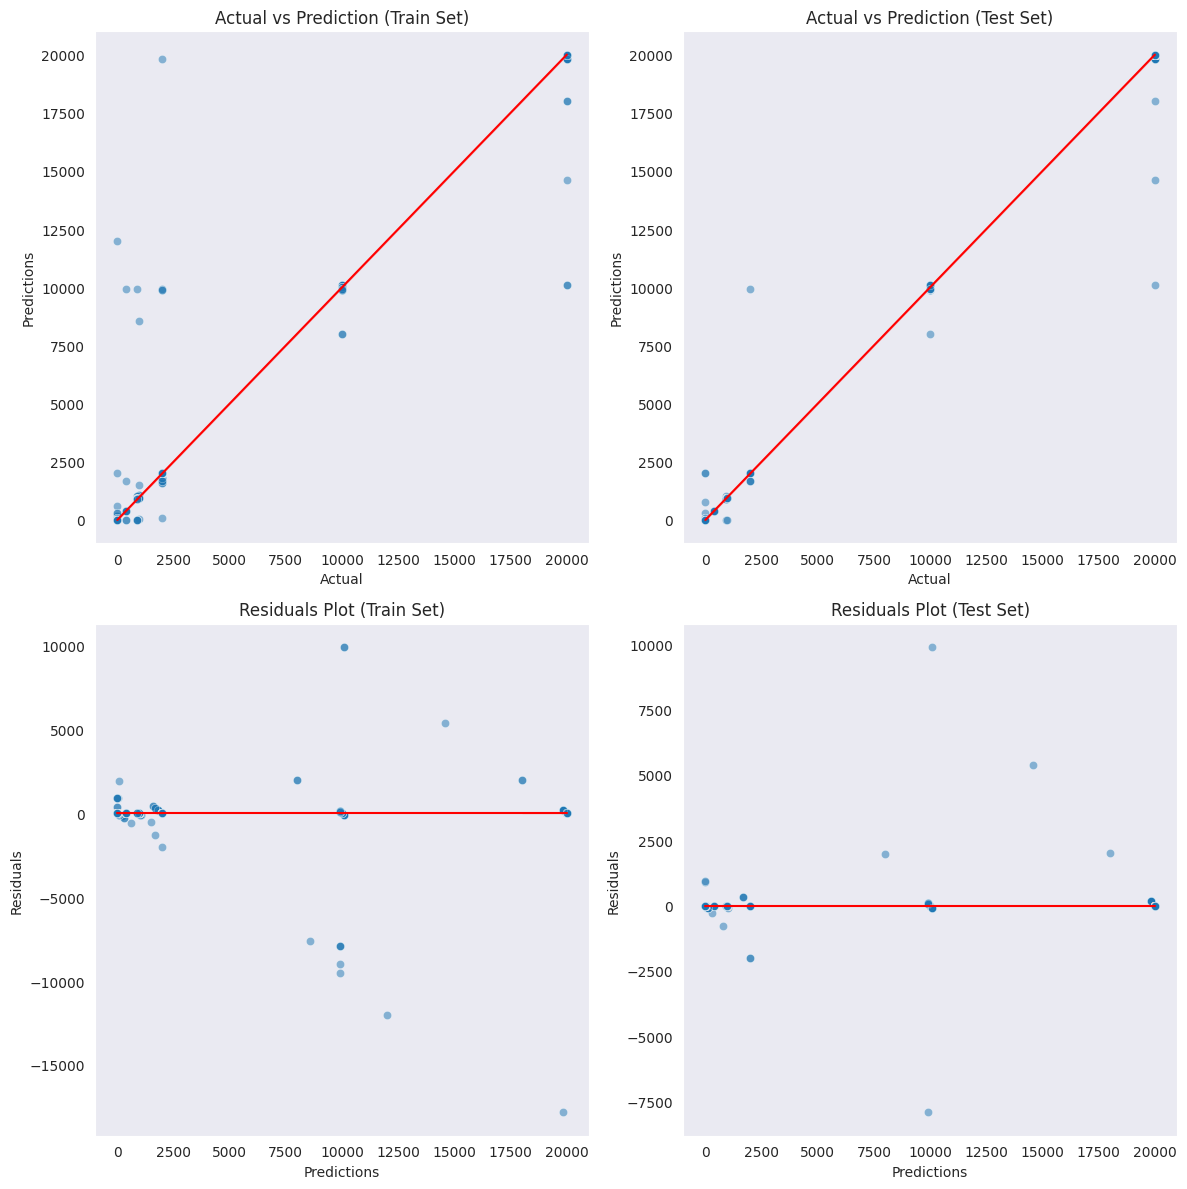

In [61]:
GSCV_regression_performance(X_train, y_train, X_test, y_test, pipelineCV)
GSCV_regression_evaluation_plots_with_residuals(X_train, y_train, X_test, y_test, pipelineCV, alpha_scatter=0.5)